# **`HOTEL BOOKING DEMAND`**

## Business Problem Understanding

**Context**  
Sebuah hotel bintang 5 merekrut Data Scientist yang mempunyai kemampuan dibidang Machine Learning untuk memprediksi apakah seorang customer akan membatalkan pesanan mereka atau tidak. Banyak orang melakukan booking di hotel mereka, akan tetapi hotel sering mengalami kerugian karena customer yang tiba-tiba membatalkan pemesanan sehingga tidak dapat ditempati oleh pelanggan lain. 

Target :
- 0 : Tidak akan cancel
- 1 : Cancel

**Problem Statement :**

Bagaimana kita dapat memprediksi dan meminimalkan pembatalan oleh customer sehingga dapat mengurangi kerugian dari orang-orang yang tiba-tiba membatalkan kamar.


**Goals :**

Maka berdasarkan permasalahan tersebut, pihak hotel ingin memiliki kemampuan untuk memprediksi kemungkinan seorang calon customer akan melakukan cancel booking pada hotel tersebut atau tidak, sehingga dapat memfokuskan pemberian kamar pada calon customer yang tidak akan me-cancel booking-an kamar mereka.


**Analytic Approach :**

Jadi yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan calon customer yang akan melakukan pembatalan booking dengan yang tidak. Kemudian kita akan membangun model klasifikasi yang akan membantu pihak hotel untuk dapat memprediksi probabilitas seorang customer akan melakukan pembatalan booking pada hotel tersebut atau tidak.

**Metric Evaluation :**
1. True Positif: Kita memprediksi customer akan me-cancel dan nyatanya customer tersebut benar me-cancel
- Impact: Bisa memaksimalkan keuntungan dengan mengisi seluruh kamar 

2. False Positif: Kita memprediksi customer akan me-cancel tapi ternyata customer tersebut tidak me-cancel 
- Impact: Bisa kehilangan customer, akan tetapi jika hotel ramai maka tidak akan ada kamar kosong karna kasus ini karna dapat diambil dari waiting list

3. True Negatif: Kita memprediksi customer tidak akan membatalkan booking dan nyatanya customer benar tidak membatalkan booking
- Impact: Tidak ada, sesuai dengan sistem booking hotel

4. False Negatif: Kita memprediksi customer tidak akan membatalkan booking tapi nyatanya customer membatalkan booking 
- Impact: Bisa menyebabkan kerugian, karena kamar yang awalnya diprediksi akan terisi, malah kosong. 

Jadi kita ingin sebanyak mungkin prediksi kelas negatif yang benar, dengan sesedikit mungkin prediksi false negatif.

In [243]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

# LOAD DATASET

This data set contains booking information for a hotel located in Portugal, and includes information regarding room reservation for respective customers.
Dataset bersumber dari Kaggle: 
- Pembuat data: JESSE MOSTIPAK 
- Tanggal : 7-10-2017

In [268]:
df = pd.read_csv('data_hotel_booking_demand.csv')
df.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


## Data Understanding dan Cleaning

### Attribute Information

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| Country | Text | Country of origin |
| market_segment | Text | Market segment designation |
| previous_cancellations | int64 | Number of previous bookings that were cancelled by the customer prior to the current booking |
| booking_changes | int64 | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation |
| deposit_types | Text | Indication on if the customer made a deposit to guarantee the booking |
| days_in_waiting_list | int64 | Number of days the booking was in the waiting list before it was confirmed to the customer |
| customer_type | Text | Type of booking |
| reserved_room_type | Text | Code of room type reserved. Code is presented instead of designation for anonymity reasons |
| required_car_parking_space | int64 | Number of car parking spaces required by the customer |
| total_of_special_request | int64 | Number of special requests made by the customer (e.g. twin bed or high floor) |
| is_canceled | int64 | Value indicating if the booking was canceled (1) or not (0) |

In [3]:
# check type data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


In [4]:
# check data kosong ada berapa banyak
df.isna().sum()

country                        351
market_segment                   0
previous_cancellations           0
booking_changes                  0
deposit_type                     0
days_in_waiting_list             0
customer_type                    0
reserved_room_type               0
required_car_parking_spaces      0
total_of_special_requests        0
is_canceled                      0
dtype: int64

### Preprocessing
Preprocessing atau pra-pemrosesan data adalah proses persiapan data sebelum dilakukan analisis atau pengolahan lebih lanjut. Preprocessing penting untuk mendapatkan hasil yang akurat dan bermakna dari analisis data.

Beberapa tahapan dalam preprocessing data antara lain:
- Data Cleaning: Menghilangkan data yang tidak valid, data yang hilang, atau outlier dari data mentah.
- Data Integration: Menggabungkan beberapa sumber data menjadi satu data yang terintegrasi.
- Data Transformation: Mengubah data mentah menjadi format yang lebih mudah dipahami dan diolah, seperti mengubah variabel menjadi skala yang sama, menormalkan data, dan mengubah format data.
- Data Reduction: Mengurangi jumlah variabel atau instance data dengan cara menghapus data yang tidak relevan atau tidak penting.

### Missing Value

In [5]:
# Show Number of Missing Value and Proportion to Dataset
print('Number of missing value in Country column : ', df['country'].isna().sum())
print('Proportion of missing value (%) : ', ((df['country'].isna().sum() / len(df)) *100).round(2))

Number of missing value in Country column :  351
Proportion of missing value (%) :  0.42


Terdapat data kosong pada kolom country dengan jumlah data kosong sebanyak 351 data, setara dengan 0.42% dari total data di dataset. 
Untuk missing value pada kolom country dengan 'Other'.

In [6]:
# handling missing value
df['country'] = df['country'].fillna('Other')

### Duplicated Data

In [7]:
# Check duplicated data
df.duplicated().sum()

73371

In [8]:
# show duplicate data
df[df.duplicated() == True]

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
7,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
22,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
29,PRT,Online TA,0,0,No Deposit,0,Transient,A,0,1,0
34,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
44,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


Terdapat sebanyak 73371 duplicate data pada dataset ini, namun tidak ada informasi unik seperti tanggal atau id number yang dapat membedakan satu data dengan lainnya. Oleh karena itu, saya tidak akan menghapus data duplicate ini lebih lanjut karena pada data ini mungkin terjadi duplicate data karna tidak adanya informasi unik yang dirujuk.

### Column Details

In [9]:
# Check column details
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().values)]);

# input data into DataFrame and show details of every column
dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,country,object,0,0.0,163,"[IRL, FRA, PRT, NLD, ESP, UMI, CN, LUX, BRA, B..."
1,market_segment,object,0,0.0,8,"[Offline TA/TO, Online TA, Direct, Groups, Cor..."
2,previous_cancellations,int64,0,0.0,15,"[0, 1, 25, 2, 3, 11, 24, 13, 6, 26, 14, 4, 19,..."
3,booking_changes,int64,0,0.0,19,"[0, 1, 2, 5, 3, 4, 6, 7, 9, 8, 17, 10, 13, 12,..."
4,deposit_type,object,0,0.0,3,"[No Deposit, Non Refund, Refundable]"
5,days_in_waiting_list,int64,0,0.0,115,"[0, 3, 39, 87, 77, 215, 97, 162, 46, 79, 4, 31..."
6,customer_type,object,0,0.0,4,"[Transient-Party, Transient, Contract, Group]"
7,reserved_room_type,object,0,0.0,10,"[A, E, D, F, B, G, C, H, L, P]"
8,required_car_parking_spaces,int64,0,0.0,5,"[0, 1, 2, 8, 3]"
9,total_of_special_requests,int64,0,0.0,6,"[0, 2, 1, 3, 4, 5]"


In [10]:
# menampilkan data unique masing-masing kolom
for col in df.columns :
    print(df[col].unique())

['IRL' 'FRA' 'PRT' 'NLD' 'ESP' 'UMI' 'CN' 'LUX' 'BRA' 'BEL' 'JPN' 'DEU'
 'ITA' 'CHE' 'GBR' 'AGO' 'SRB' 'COL' 'CHN' 'SWE' 'AUT' 'CIV' 'CZE' 'POL'
 'USA' 'SGP' 'RUS' 'ROU' 'DNK' 'IND' 'MAR' 'PHL' 'ARG' 'ISL' 'ZAF' 'LBN'
 'MOZ' 'TUR' 'BGD' 'MEX' 'CAF' 'NOR' 'FIN' 'UKR' 'EGY' 'ISR' 'Other' 'KOR'
 'AZE' 'HUN' 'AUS' 'EST' 'CHL' 'SVN' 'PRY' 'ABW' 'ALB' 'LTU' 'ARE' 'HRV'
 'SAU' 'NZL' 'LVA' 'ATA' 'KAZ' 'DZA' 'TWN' 'CRI' 'BIH' 'BGR' 'IRQ' 'OMN'
 'VEN' 'IDN' 'GEO' 'MLT' 'IRN' 'BLR' 'URY' 'LBY' 'TUN' 'BEN' 'MYS' 'MWI'
 'GRC' 'CYP' 'CPV' 'HKG' 'PRI' 'MKD' 'MUS' 'IMN' 'PAN' 'NGA' 'GLP' 'KHM'
 'PER' 'QAT' 'SEN' 'MAC' 'SVK' 'BHR' 'ECU' 'SYC' 'BOL' 'TJK' 'LCA' 'MDV'
 'SYR' 'ZMB' 'LIE' 'THA' 'MNE' 'BRB' 'CMR' 'JEY' 'GTM' 'LKA' 'JOR' 'TZA'
 'AND' 'ARM' 'GIB' 'VNM' 'PAK' 'JAM' 'DOM' 'KWT' 'LAO' 'RWA' 'FRO' 'GAB'
 'ETH' 'CUB' 'COM' 'GNB' 'GGY' 'NIC' 'TGO' 'TMP' 'CYM' 'GHA' 'SLE' 'BWA'
 'NCL' 'UZB' 'SUR' 'SDN' 'PLW' 'MLI' 'MMR' 'BFA' 'SLV' 'BDI' 'ZWE' 'UGA'
 'DMA' 'VGB' 'KIR' 'KEN' 'MYT' 'KNA' 'AIA']
['Offl

### Cleaning

Pada market_segment terdapat data Undefined 1 baris, sehingga saya memutuskan untuk menghapus saja data tersebut.

In [11]:
df = df[~(df['market_segment']=='Undefined')].reset_index(drop=True)

Pada reserved_room_type dan country, karna terdapat beberapa data yang sedikit dan hal ini akan mengakibatkan data sulit untuk dipelajari, sehingga saya mengganti data yang sedikit itu (kurang dari 10) dengan 'other' 

In [13]:
# mencari index dari reserved_room_type yang memiliki data sedikit 
val_reserved = df['reserved_room_type'].value_counts() 
list_reserved_drop = val_reserved[val_reserved<10].index
list_reserved_drop

Index(['P', 'L'], dtype='object')

In [14]:
#mengganti data yang telah ditentukan dengan 'other' 
r = pd.Series(np.where(df['reserved_room_type'].isin(list_reserved_drop), 'Other', df['reserved_room_type']))

# memasukkannya kedalam dataframe
df['reserved_room_type'] = r

In [15]:
# mencari index dari country yang memiliki data sedikit (kurng dari 4)
country = df['country'].value_counts()
list_country_drop = country[country<=3].index
list_country_drop

Index(['ETH', 'MUS', 'GHA', 'KEN', 'CIV', 'GAB', 'GTM', 'PRY', 'CAF', 'ZWE',
       'SYR', 'TGO', 'TMP', 'COM', 'SLV', 'UZB', 'SUR', 'GGY', 'BRB', 'KHM',
       'IMN', 'MNE', 'LIE', 'MWI', 'ABW', 'LAO', 'PLW', 'MMR', 'BFA', 'MYT',
       'UGA', 'BDI', 'KIR', 'VGB', 'DMA', 'KNA', 'MLI', 'BEN', 'SDN', 'NCL',
       'BWA', 'SLE', 'CYM', 'NIC', 'RWA', 'ZMB', 'LCA', 'SYC', 'GLP', 'ATA',
       'UMI', 'AIA'],
      dtype='object')

In [16]:
# mengganti data yang telah ditentukan indexnya dengan 'other'
c = pd.Series(np.where(df['country'].isin(list_country_drop), 'Other', df['country']))

# dan memasukkan kedalam dataframe
df['country'] = c

### Outliers

In [107]:
# kolom dengan data kategorikal
cat_features = [feature for feature in df.columns if (df[feature].dtypes == 'O')]
cat_features

['country',
 'market_segment',
 'deposit_type',
 'customer_type',
 'reserved_room_type']

In [108]:
# kolom dengan data numerical
num_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['is_canceled']))]
num_features

['previous_cancellations',
 'booking_changes',
 'days_in_waiting_list',
 'required_car_parking_spaces',
 'total_of_special_requests']

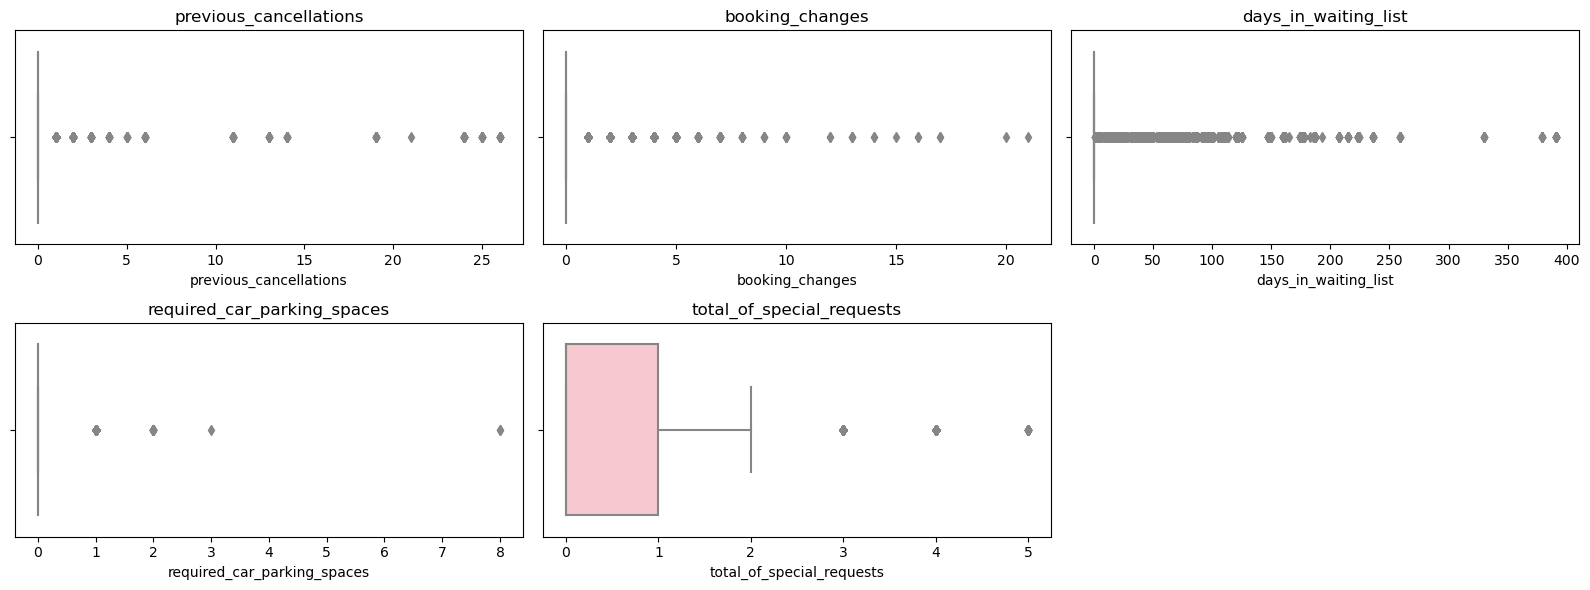

In [105]:
col_names = num_features
plotnumber = 1
plt.figure(figsize=(16,6))

for kolom in col_names:
    plt.subplot(2,3, plotnumber)
    sns.boxplot(data=df, x=kolom, color='pink')
    plt.title(kolom)
    plt.tight_layout()

    plotnumber += 1

Sudah tidak ada missing value. Dataset ini terdiri dari informasi setiap reservasi yang dilakukan ke hotel, sehingga setiap baris terdiri dari satu transaksi reservasi. Terdapat outliers pada data ini, akan tetapi karena outliers ini dianggap sebagai data berbeda, agar machine dapat belajar dari banyak data, sehingga saya memutuskan untuk tidak menghapus outliers pada data ini. Sekarang data yang kita miliki sudah bersih, mari sekarang kita lanjut ke tahap analisa datanya untuk keperluan masalah kita.

### Feature Column

In [17]:
# mild imbalance : cek apakah data imbalance atau balance 
print(df['is_canceled'].value_counts())
print()
print(df['is_canceled'].value_counts()/len(df['is_canceled'])*100)

# dari hasil terlihat bahwa datanya timpang, solusi dari masalah ini bisa dari feature engineering, resampling atau penggunaan model tertentu

0    52795
1    30777
Name: is_canceled, dtype: int64

0    63.173072
1    36.826928
Name: is_canceled, dtype: float64


### Define X and y
Kita mendefinisikan feature dan target sebagai X dan y 

In [18]:
X = df.drop(columns='is_canceled')

y = df['is_canceled']

### Data Splitting
Melakukan splitting data menjadi 80% untuk data train dan split data menjadi 20% untuk data test.

Data splitting adalah proses memisahkan dataset menjadi dua atau lebih subset yang berbeda untuk tujuan pengujian dan evaluasi model. Dataset awal biasanya dibagi menjadi subset pelatihan(train) dan subset pengujian (test). Subset pelatihan digunakan untuk melatih model, sedangkan subset pengujian digunakan untuk menguji kinerja model yang dilatih.

Tujuan dari data splitting adalah untuk mengevaluasi kinerja model pada data yang belum pernah dilihat sebelumnya, sehingga dapat menghindari overfitting atau overgeneralization pada data pelatihan. Dengan membagi dataset menjadi subset pelatihan dan pengujian, model dapat diuji pada data yang independen, sehingga memastikan bahwa model tidak hanya menghafal data pelatihan tetapi juga dapat menggeneralisasikan dengan baik pada data baru.

In [106]:
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    stratify=y,  
    test_size=0.2,
    random_state=0
)

# Stratified = data dibagi menjadi subset pelatihan dan pengujian dengan mempertahankan distribusi proporsi kelas yang sama pada kedua subset. 
# Metode ini digunakan ketika dataset memiliki kelas yang tidak seimbang.

Beberapa teknik preprocessing data yang sering digunakan antara lain:

- Imputasi: Teknik untuk mengisi nilai yang hilang pada dataset.
- Pengkodean atau encoding: Mengubah variabel kategorikal menjadi numerik.
- Transformasi: Mengubah skala data, seperti log transform, dan normalisasi.
- Pengurutan dan pengelompokkan: Mengurutkan dan mengelompokkan data ke dalam kategori-kategori tertentu.
- Pemilihan fitur: Memilih variabel yang paling relevan untuk analisis data.

- Scaling: 'previous_cancellations','booking_changes','days_in_waiting_list','required_car_parking_spaces','total_of_special_requests'
- Encoding: 
    - onehot: 'market_segment', 'deposit_type', 'customer_type', 'reserved_room_type' --> karna hanya memiliki sedikit unique value
    - binary: 'country' --> karna memiliki terlalu banyak unique value

In [23]:
pipe_poly_scaling = Pipeline([
    ('poly',PolynomialFeatures(degree=1)),
    ('scaling',RobustScaler())
])

# Transformer scheme
transformer = ColumnTransformer([
    ('pipe_poly_scaling', pipe_poly_scaling, ['previous_cancellations','booking_changes','days_in_waiting_list','required_car_parking_spaces','total_of_special_requests']),
    ('onehot', OneHotEncoder(drop='first'), ['market_segment', 'deposit_type', 'customer_type', 'reserved_room_type']),
    ('binary', ce.BinaryEncoder(), ['country'])
], remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_poly_scaling',
                                 Pipeline(steps=[('poly',
                                                  PolynomialFeatures(degree=1)),
                                                 ('scaling', RobustScaler())]),
                                 ['previous_cancellations', 'booking_changes',
                                  'days_in_waiting_list',
                                  'required_car_parking_spaces',
                                  'total_of_special_requests']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['market_segment', 'deposit_type',
                                  'customer_type', 'reserved_room_type']),
                                ('binary', BinaryEncoder(), ['country'])])

### Benchmark Model
Cross Validation untuk menemukan best benchmark modelnya

In [24]:
logreg = LogisticRegression(random_state=0, class_weight='balanced')
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=0, class_weight='balanced') 
rf = RandomForestClassifier(random_state=0, class_weight='balanced') 
ada = AdaBoostClassifier(tree, random_state=0)
gbc = GradientBoostingClassifier(random_state=0)
xgbc = XGBClassifier(random_state=0, verbosity=0, class_weight='balanced')

In [25]:
# resampling
smote = SMOTE(random_state=0)
nearmiss = NearMiss()
rus = RandomUnderSampler(random_state=0)
ros = RandomOverSampler(random_state=0)

In [26]:
# Define imbalanced treatment method
models = [logreg, knn, tree, rf, ada, gbc, xgbc]
nilai_all = []
nilai_mean = []
nilai_std = []

for i in models:
    pipe_model = Pipeline([
        ('transformer', transformer),
        ('sampling', rus),
        ('model', i)
    ])

    model_cv = cross_val_score(
        estimator= pipe_model,
        X= X_train,
        y= y_train,
        cv = 5, 
        scoring= 'recall'
    )

    nilai_all.append(model_cv.round(4))
    nilai_mean.append(model_cv.mean())
    nilai_std.append(model_cv.std())

In [27]:
# dataframe dari hasil cross validation sehingga lebih mudah dibaca
df_cv = pd.DataFrame({
    'algo':models,
    'mean' : nilai_mean,
    'std' : nilai_std,
    'all':nilai_all
})
df_cv

,algo,mean,std,all
0,"LogisticRegression(class_weight='balanced', ra...",0.688315,0.005954,"[0.6907, 0.6912, 0.6773, 0.6877, 0.6948]"
1,KNeighborsClassifier(),0.414321,0.007757,"[0.4145, 0.4126, 0.4027, 0.4147, 0.4271]"
2,DecisionTreeClassifier(class_weight='balanced'...,0.803095,0.007398,"[0.8008, 0.8104, 0.7947, 0.7965, 0.8132]"
3,RandomForestClassifier(class_weight='balanced'...,0.811218,0.005953,"[0.8093, 0.8187, 0.8069, 0.8036, 0.8176]"
4,AdaBoostClassifier(estimator=DecisionTreeClass...,0.803216,0.007431,"[0.8008, 0.811, 0.7947, 0.7967, 0.813]"
5,GradientBoostingClassifier(random_state=0),0.748062,0.019438,"[0.7593, 0.7111, 0.7463, 0.7591, 0.7644]"
6,"XGBClassifier(base_score=None, booster=None, c...",0.796799,0.005392,"[0.804, 0.8006, 0.7888, 0.7931, 0.7975]"


Model RandomForestClassifier dan DecisionTreeClassifier dipilih menjadi 2 model paling optimal karna memiliki nilai mean paling tinggi dan paling stabil karna memiliki standar deviasi yang kecil. Selanjutnya akan dilakukan hyperparameter tuning untuk kedua model ini.

### Hyperparameter Tuning
`DecisionTreeClassifier`

Hyperparameter tuning adalah proses untuk mencari parameter terbaik yang dapat meningkatkan kinerja model machine learning. Hyperparameter adalah parameter yang tidak dapat dipelajari oleh model, tetapi dapat diatur sebelum melatih model. Contoh dari hyperparameter pada model machine learning seperti learning rate, jumlah epoch, jumlah hidden layer, dan banyak lagi.

Tujuan dari hyperparameter tuning adalah untuk menemukan set hyperparameter terbaik yang mengoptimalkan kinerja model pada dataset tertentu. Hal ini dapat dilakukan dengan beberapa metode, di antaranya:
- Grid search: mencari set hyperparameter terbaik dengan melakukan iterasi pada setiap kombinasi hyperparameter yang diinginkan.
- Random search: mencari set hyperparameter terbaik dengan mengambil sampel acak dari ruang hyperparameter yang mungkin.
- Bayesian optimization: mencari set hyperparameter terbaik dengan memanfaatkan algoritma probabilistik untuk memilih hyperparameter berikutnya berdasarkan hasil evaluasi model sebelumnya.
Proses hyperparameter tuning harus dilakukan setelah melakukan preprocessing data dan memilih algoritma machine learning yang tepat. Hal ini dapat membantu meningkatkan kinerja model dan mencegah overfitting atau underfitting. Oleh karena itu, penting untuk melakukan hyperparameter tuning secara cermat dan hati-hati untuk memastikan bahwa model machine learning yang dihasilkan optimal dan sesuai dengan dataset yang digunakan.

Tuning pertama untuk algorithm DecisionTreeClassifier

In [115]:
criterion = ["gini", "entropy", "log_loss"]
max_depth = list(np.arange(3,50,1))               # kedalaman pohon
min_samples_leaf = list(np.arange(2,100,2))
min_samples_split = list(np.arange(2,100,2) )
max_features = list(np.arange(1,len(X.columns),1))            # jumlah feature yang digunakan untuk pertimbangan splitting (% dari total kolom train set)

# Hyperparameter space DecisionTreeClassifier
hyperparam_space_dtc = {
    'resampler':[smote, rus, ros, nearmiss, None],
    'model__criterion': criterion,
    'model__max_depth':max_depth,
    'model__min_samples_leaf':min_samples_leaf,
    'model__min_samples_split': min_samples_split,
    'model__max_features':max_features,
    'model__random_state':[0]
}

# Benchmark model 1
dtc = tree

# Create the algorithm chains
estimator_dtc = Pipeline([
    ('tansformer', transformer),
    ('resampler', rus), 
    ('model', dtc)
    ])

# Hyperparameter tuning
random_dtc = RandomizedSearchCV(    # karna jumlah data yang sangat banyak (83.573) saya memutuskan menggunakan randomizedsearch 
    estimator = estimator_dtc, 
    param_distributions = hyperparam_space_dtc, 
    cv = 5, 
    scoring = 'recall', 
    n_jobs = -1, 
    random_state=0,
    n_iter=500
)

Randomized search dan grid search adalah dua teknik yang umum digunakan dalam hyperparameter tuning pada machine learning.

Grid search melakukan pencarian sistematis pada seluruh kombinasi dari beberapa hyperparameter. Hyperparameter tuning menggunakan grid search bisa memakan waktu yang lama terutama ketika jumlah hyperparameter atau nilai hyperparameter yang harus ditelusuri sangat besar.

Randomized search pada dasarnya sama dengan grid search, namun, ia tidak mengevaluasi seluruh kombinasi hyperparameter, melainkan hanya beberapa kombinasi hyperparameter yang dipilih secara acak. Randomized search biasanya lebih efisien karena hanya memeriksa kombinasi hyperparameter tertentu, yang dapat menghasilkan kinerja model yang lebih baik dengan waktu yang lebih sedikit.

Kelebihan grid search adalah bahwa ia dapat menemukan kombinasi hyperparameter yang terbaik secara akurat, terutama ketika parameter tidak saling terkait. Namun, jika hyperparameter saling terkait atau jumlah hyperparameter yang tinggi, grid search bisa memakan waktu yang lama dan kurang efisien.

Kelebihan randomized search adalah lebih cepat dan lebih efisien, terutama ketika jumlah hyperparameter yang besar atau hyperparameter saling terkait. Namun, randomized search mungkin tidak mengeksplorasi seluruh ruang hyperparameter dan tidak menjamin menemukan solusi yang optimal.

Oleh karena itu, pemilihan antara randomized search atau grid search tergantung pada kompleksitas masalah dan sumber daya yang tersedia. Untuk kasus-kasus di mana waktu adalah faktor kritis, randomized search adalah pilihan yang lebih baik karena biasanya lebih cepat. Namun, jika waktu bukan masalah dan kita ingin memastikan bahwa kita mengeksplorasi seluruh ruang hyperparameter, grid search mungkin lebih tepat.

In [36]:
# fitting the randomsearch for DecisionTreeClassifier best params ke X_train, y_train
random_dtc.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('tansformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_poly_scaling',
                                                                               Pipeline(steps=[('poly',
                                                                                                PolynomialFeatures(degree=1)),
                                                                                               ('scaling',
                                                                                                RobustScaler())]),
                                                                               ['previous_cancellations',
                                                                                'booking_changes',
                                                                                'days_in_waiting_list',
                                                                                'required_car_parking_spaces',
                                                                                'total_of_special_requests'])...
                                                                    28, 30, 32,
                                                                    34, 36, 38,
                                                                    40, 42, 44,
                                                                    46, 48, 50,
                                                                    52, 54, 56,
                                                                    58, 60, ...],
                                        'model__min_samples_split': [2, 4, 6, 8,
                                                                     10, 12, 14,
                                                                     16, 18, 20,
                                                                     22, 24, 26,
                                                                     28, 30, 32,
                                                                     34, 36, 38,
                                                                     40, 42, 44,
                                                                     46, 48, 50,
                                                                     52, 54, 56,
                                                                     58, 60, ...],
                                        'model__random_state': [0],
                                        'resampler': [SMOTE(random_state=0),
                                                      RandomUnderSampler(random_state=0),
                                                      RandomOverSampler(random_state=0),
                                                      NearMiss(), None]},
                   random_state=0, scoring='recall')

In [37]:
# menampilkan 5 parameter terbaik untuk DecisionTreeClassifier setelah tuning pertama 
pd.DataFrame(random_dtc.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_resampler,param_model__random_state,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_features,param_model__max_depth,param_model__criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
495,5.084421,0.022727,0.075255,0.010262,SMOTE(random_state=0),0,32,80,9,6,gini,"{'resampler': SMOTE(random_state=0), 'model__r...",0.859261,0.930964,0.879366,0.930950,0.932169,0.906542,0.031058,1
331,0.380098,0.018457,0.076203,0.012181,RandomUnderSampler(random_state=0),0,94,40,1,4,gini,{'resampler': RandomUnderSampler(random_state=...,0.858448,0.826802,0.845857,0.843826,0.848903,0.844767,0.010287,2
496,5.027058,0.030544,0.073689,0.008758,SMOTE(random_state=0),0,42,88,2,6,gini,"{'resampler': SMOTE(random_state=0), 'model__r...",0.770106,0.760000,0.882413,0.828595,0.756702,0.799563,0.048943,3
87,5.973232,0.107880,0.090847,0.015761,SMOTE(random_state=0),0,54,2,9,49,entropy,"{'resampler': SMOTE(random_state=0), 'model__r...",0.796304,0.799594,0.786353,0.798132,0.805240,0.797124,0.006159,4
188,0.467760,0.057022,0.083999,0.018649,RandomUnderSampler(random_state=0),0,82,2,6,35,gini,{'resampler': RandomUnderSampler(random_state=...,0.813769,0.783553,0.788383,0.798132,0.801381,0.797044,0.010552,5


In [109]:
# menampilkan best score untuk DecisionTreeClassifier setelah tuning 1
print('DecisionTreeClassifier')
print('Best_score:', random_dtc.best_score_)
print('Best_params:', random_dtc.best_params_)

DecisionTreeClassifier
Best_score: 0.9065422029054832
Best_params: {'resampler': SMOTE(random_state=0), 'model__random_state': 0, 'model__min_samples_split': 32, 'model__min_samples_leaf': 80, 'model__max_features': 9, 'model__max_depth': 6, 'model__criterion': 'gini'}


### Hyperparameter Tuning ke-2
`DecisionTreeClassifier`

**saya akan mempersempit rentang parameter yang telah didapat dari bestparameter pada tuning pertama**
- 'resampler': SMOTE(random_state=0), 
- 'model__random_state': 0, 
- 'model__min_samples_split': 32, 
- 'model__min_samples_leaf': 80, 
- 'model__max_features': 9, 
- 'model__max_depth': 6, 
- 'model__criterion': 'gini'}

In [44]:
criterion = ["gini"]
max_depth = list(np.arange(3,20,1))               # kedalaman pohon
min_samples_leaf = list(np.arange(60,100,1))
min_samples_split = list(np.arange(30,100,1) )
max_features = list(np.arange(1,len(X.columns),1))            # jumlah feature yang digunakan untuk pertimbangan splitting (% dari total kolom train set)

# Hyperparameter space DecisionTreeClassifier
hyperparam_space_dtc = {
    'resampler':[smote, rus],
    'model__criterion': criterion,
    'model__max_depth':max_depth,
    'model__min_samples_leaf':min_samples_leaf,
    'model__min_samples_split': min_samples_split,
    'model__max_features':max_features,
    'model__random_state':[0]
}

# Benchmark model 1
dtc = tree

# Create the algorithm chains
estimator_dtc = Pipeline([
    ('tansformer', transformer),
    ('resampler', rus), 
    ('model', dtc)
    ])

# Hyperparameter tuning
random_dtc_2 = RandomizedSearchCV(
    estimator = estimator_dtc, 
    param_distributions = hyperparam_space_dtc, 
    cv = 5, 
    scoring = 'recall', 
    n_jobs = -1, 
    random_state=0,
    n_iter=500
)

In [45]:
# fitting the randomsearch for DecisionTreeClassifier best params setelah tuning 2 kali ke X_train, y_train
random_dtc_2.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('tansformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_poly_scaling',
                                                                               Pipeline(steps=[('poly',
                                                                                                PolynomialFeatures(degree=1)),
                                                                                               ('scaling',
                                                                                                RobustScaler())]),
                                                                               ['previous_cancellations',
                                                                                'booking_changes',
                                                                                'days_in_waiting_list',
                                                                                'required_car_parking_spaces',
                                                                                'total_of_special_requests'])...
                                        'model__min_samples_leaf': [60, 61, 62,
                                                                    63, 64, 65,
                                                                    66, 67, 68,
                                                                    69, 70, 71,
                                                                    72, 73, 74,
                                                                    75, 76, 77,
                                                                    78, 79, 80,
                                                                    81, 82, 83,
                                                                    84, 85, 86,
                                                                    87, 88, 89, ...],
                                        'model__min_samples_split': [30, 31, 32,
                                                                     33, 34, 35,
                                                                     36, 37, 38,
                                                                     39, 40, 41,
                                                                     42, 43, 44,
                                                                     45, 46, 47,
                                                                     48, 49, 50,
                                                                     51, 52, 53,
                                                                     54, 55, 56,
                                                                     57, 58, 59, ...],
                                        'model__random_state': [0],
                                        'resampler': [SMOTE(random_state=0),
                                                      RandomUnderSampler(random_state=0)]},
                   random_state=0, scoring='recall')

In [46]:
print('DecisionTreeClassifier')
print('Best_score:', random_dtc_2.best_score_)
print('Best_params:', random_dtc_2.best_params_)

DecisionTreeClassifier
Best_score: 0.9679545497655738
Best_params: {'resampler': RandomUnderSampler(random_state=0), 'model__random_state': 0, 'model__min_samples_split': 76, 'model__min_samples_leaf': 73, 'model__max_features': 1, 'model__max_depth': 3, 'model__criterion': 'gini'}


### Hyperparameter Tuning
`RandomForestClassifier`

Mencoba tuning pertama dengan model RandomForestClassifier 

In [66]:
criterion = ["gini", "entropy", "log_loss"]
n_estimators = list(np.arange(1,100,1))          # jumlah pohon
max_features = list(np.arange(1,len(X.columns),1))            # jumlah feature yang digunakan untuk pertimbangan splitting (% dari total kolom train set)
max_depth = list(np.arange(3,100,2))               # kedalaman pohon
min_samples_leaf = list(np.arange(1,50,1))
min_samples_split = list(np.arange(1,100,2))

# Hyperparameter space RandomForestClassifier
hyperparam_space_rf = {
    'resampler':[smote, rus, ros, nearmiss, None],
    'model__criterion': criterion,
    'model__n_estimators': n_estimators,
    'model__max_features':max_features,
    'model__max_depth':max_depth,
    'model__min_samples_leaf':min_samples_leaf,
    'model__min_samples_split': min_samples_split,
    'model__random_state':[0]
}

# Benchmark model 1
dtc = rf

# Create the algorithm chains
estimator_rf = Pipeline([
    ('tansformer', transformer),
    ('resampler', rus), 
    ('model', rf)
    ])

# Hyperparameter tuning
random_rf = RandomizedSearchCV(
    estimator = estimator_rf, 
    param_distributions = hyperparam_space_rf, 
    cv = 5, 
    scoring = 'recall', 
    n_jobs = -1, 
    random_state=0,
    n_iter=500
)

In [67]:
# fitting the randomsearch for RandomForest best params ke X_train, y_train
random_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('tansformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_poly_scaling',
                                                                               Pipeline(steps=[('poly',
                                                                                                PolynomialFeatures(degree=1)),
                                                                                               ('scaling',
                                                                                                RobustScaler())]),
                                                                               ['previous_cancellations',
                                                                                'booking_changes',
                                                                                'days_in_waiting_list',
                                                                                'required_car_parking_spaces',
                                                                                'total_of_special_requests'])...
                                                                     21, 23, 25,
                                                                     27, 29, 31,
                                                                     33, 35, 37,
                                                                     39, 41, 43,
                                                                     45, 47, 49,
                                                                     51, 53, 55,
                                                                     57, 59, ...],
                                        'model__n_estimators': [1, 2, 3, 4, 5,
                                                                6, 7, 8, 9, 10,
                                                                11, 12, 13, 14,
                                                                15, 16, 17, 18,
                                                                19, 20, 21, 22,
                                                                23, 24, 25, 26,
                                                                27, 28, 29, 30, ...],
                                        'model__random_state': [0],
                                        'resampler': [SMOTE(random_state=0),
                                                      RandomUnderSampler(random_state=0),
                                                      RandomOverSampler(random_state=0),
                                                      NearMiss(), None]},
                   random_state=0, scoring='recall')

In [68]:
pd.DataFrame(random_rf.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_resampler,param_model__random_state,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_features,param_model__max_depth,param_model__criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
346,0.632266,0.014078,0.090603,0.006249,RandomUnderSampler(random_state=0),0,4,13,1,6,73,entropy,{'resampler': RandomUnderSampler(random_state=...,0.815800,0.807919,0.805849,0.810926,0.810926,0.810284,0.003362,1
124,0.653056,0.010672,0.099931,0.003479,RandomOverSampler(random_state=0),0,1,73,1,7,93,log_loss,{'resampler': RandomOverSampler(random_state=0...,0.799959,0.808122,0.793054,0.799147,0.807067,0.801470,0.005551,2
250,13.154337,0.289068,0.337420,0.015931,SMOTE(random_state=0),0,64,11,1,6,73,log_loss,"{'resampler': SMOTE(random_state=0), 'model__r...",0.794679,0.799797,0.793867,0.793054,0.806052,0.797490,0.004885,3
236,12.087226,0.306119,0.240170,0.007192,SMOTE(random_state=0),0,48,65,1,9,99,log_loss,"{'resampler': SMOTE(random_state=0), 'model__r...",0.794476,0.798985,0.794070,0.795695,0.803412,0.797327,0.003498,4
490,15.353685,0.645209,0.368663,0.018746,SMOTE(random_state=0),0,80,13,1,7,25,log_loss,"{'resampler': SMOTE(random_state=0), 'model__r...",0.792851,0.799391,0.794882,0.791430,0.807880,0.797287,0.005940,5


In [110]:
# menampilkan best score dan best parameter dari randomforest classifier setelah tuning pertama
print('RandomForestClassifier')
print('Best_score:', random_rf.best_score_)
print('Best_params:', random_rf.best_params_)

RandomForestClassifier
Best_score: 0.8102840000494831
Best_params: {'resampler': RandomUnderSampler(random_state=0), 'model__random_state': 0, 'model__n_estimators': 4, 'model__min_samples_split': 13, 'model__min_samples_leaf': 1, 'model__max_features': 6, 'model__max_depth': 73, 'model__criterion': 'entropy'}


### Hyperparameter Tuning ke-2
`RandomForestClassifier`

**saya akan mempersempit rentang parameter yang telah didapat dari bestparameter pada tuning pertama**
- 'resampler': RandomUnderSampler(random_state=0), 
- 'model__random_state': 0, 
- 'model__n_estimators': 4, 
- 'model__min_samples_split': 13, 
- 'model__min_samples_leaf': 1, 
- 'model__max_features': 6, 
- 'model__max_depth': 73, 
- 'model__criterion': 'entropy'

In [88]:
criterion = ["entropy", "log_loss"]
n_estimators = list(np.arange(1,100,2))          # jumlah pohon
max_features = list(np.arange(1,len(X.columns),1))            # jumlah feature yang digunakan untuk pertimbangan splitting (% dari total kolom train set)
max_depth = list(np.arange(25,100,2))               # kedalaman pohon
min_samples_leaf = list(np.arange(1,20,1))
min_samples_split = list(np.arange(10,80,2) )

# Hyperparameter space RandomForestClassifier
hyperparam_space_rf = {
    'resampler':[smote, rus, ros],
    'model__criterion': criterion,
    'model__n_estimators': n_estimators,
    'model__max_features':max_features,
    'model__max_depth':max_depth,
    'model__min_samples_leaf':min_samples_leaf,
    'model__min_samples_split': min_samples_split,
    'model__random_state':[0]
}

# Benchmark model 1
dtc = rf

# Create the algorithm chains
estimator_rf = Pipeline([
    ('tansformer', transformer),
    ('resampler', rus), 
    ('model', rf)
    ])

# Hyperparameter tuning
random_rf_2 = RandomizedSearchCV(
    estimator = estimator_rf, 
    param_distributions = hyperparam_space_rf, 
    cv = 5, 
    scoring = 'recall', 
    n_jobs = -1, 
    random_state=0,
    n_iter=500
)

In [89]:
# fitting the randomsearch for DecisionTreeClassifier best params setelah tuning 2 kali ke X_train, y_trainc
random_rf_2.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('tansformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_poly_scaling',
                                                                               Pipeline(steps=[('poly',
                                                                                                PolynomialFeatures(degree=1)),
                                                                                               ('scaling',
                                                                                                RobustScaler())]),
                                                                               ['previous_cancellations',
                                                                                'booking_changes',
                                                                                'days_in_waiting_list',
                                                                                'required_car_parking_spaces',
                                                                                'total_of_special_requests'])...
                                                                     22, 24, 26,
                                                                     28, 30, 32,
                                                                     34, 36, 38,
                                                                     40, 42, 44,
                                                                     46, 48, 50,
                                                                     52, 54, 56,
                                                                     58, 60, 62,
                                                                     64, 66, 68, ...],
                                        'model__n_estimators': [1, 3, 5, 7, 9,
                                                                11, 13, 15, 17,
                                                                19, 21, 23, 25,
                                                                27, 29, 31, 33,
                                                                35, 37, 39, 41,
                                                                43, 45, 47, 49,
                                                                51, 53, 55, 57,
                                                                59, ...],
                                        'model__random_state': [0],
                                        'resampler': [SMOTE(random_state=0),
                                                      RandomUnderSampler(random_state=0),
                                                      RandomOverSampler(random_state=0)]},
                   random_state=0, scoring='recall')

In [90]:
print('DecisionTreeClassifier')
print('Best_score:', random_rf_2.best_score_)
print('Best_params:', random_rf_2.best_params_)

DecisionTreeClassifier
Best_score: 0.8042319685617322
Best_params: {'resampler': RandomUnderSampler(random_state=0), 'model__random_state': 0, 'model__n_estimators': 33, 'model__min_samples_split': 18, 'model__min_samples_leaf': 1, 'model__max_features': 3, 'model__max_depth': 89, 'model__criterion': 'entropy'}


## Predict to Test Set


Prediksi ke subset pengujian adalah tahap akhir dari proses pembuatan model machine learning. Setelah proses pelatihan model selesai, model akan digunakan untuk memprediksi nilai target pada subset pengujian. Hal ini dilakukan untuk mengevaluasi kinerja model pada data yang belum pernah dilihat sebelumnya.

Proses prediksi ke subset pengujian dilakukan dengan menggunakan model yang telah dilatih pada subset pelatihan. Data subset pengujian kemudian disajikan ke dalam model untuk melakukan prediksi. Hasil prediksi kemudian dibandingkan dengan nilai target yang sebenarnya untuk mengukur kinerja model.

Beberapa metrik evaluasi yang umum digunakan untuk mengukur kinerja model machine learning pada subset pengujian adalah akurasi, presisi, recall, F1 score, dan area under the ROC curve. Hasil evaluasi ini akan memberikan informasi tentang seberapa baik model dapat memprediksi nilai target pada data yang belum pernah dilihat sebelumnya.

Setelah model dinilai, dapat dilakukan penyesuaian hyperparameter atau preprocessing data yang lebih baik jika kinerja model masih belum memuaskan pada subset pengujian. Setelah model telah dioptimalkan, maka dapat digunakan untuk memprediksi nilai target pada data yang belum dilihat sebelumnya di dunia nyata.

Setelah di hyperparameter tuning, didapatkan bahwa DecisionTree mneghasilkan nilai terbaik, sehingga algortithm DecisionTree lah yang akan dipilih untuk dilakukan pengujian ke test set.

`Before Hyperparameter Tuning`

In [112]:
model = Pipeline([
    ('transformer', transformer),
    ('resampler', rus),
    ('model', tree)
])

# fitting
model.fit(X_train, y_train)

# predict
y_pred_before = model.predict(X_test)

# recall score
score_before = recall_score(y_test, y_pred_before)
score_before


[0.7935347628330085]

In [291]:
y_pred_before_all = model.predict(X)

`After Hyperparameter Tuning`

In [94]:
# best model
dtc_tuning = random_dtc.best_estimator_

# fitting
dtc_tuning.fit(X_train, y_train)

# predict
y_pred_dtc_tuning = dtc_tuning.predict(X_test)

# recall score
recall_dtc_tuning = recall_score(y_test, y_pred_dtc_tuning)
recall_dtc_tuning

0.9283625730994152

`After Hyperparameter Tuning 2`

In [95]:
# best model
dtc_tuning2 = random_dtc_2.best_estimator_

# fitting
dtc_tuning2.fit(X_train, y_train)

# predict
y_pred_dtc_tuning2 = dtc_tuning2.predict(X_test)

# recall score
recall_dtc_tuning2 = recall_score(y_test, y_pred_dtc_tuning2)
recall_dtc_tuning2

0.9673489278752436

In [296]:
y_pred_dtc_all = dtc_tuning.predict(X)
y_pred_dtc_all

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

### Comparison (Test Set)

In [113]:
score_beforeafter_tuning = pd.DataFrame({
    'Model': 'DecisionTreeClassifier',
    'Before tuning': score_before,
    'Recall score tuning 1': recall_dtc_tuning,
    'Recall score tuning 2': recall_dtc_tuning2
})

score_beforeafter_tuning

,Model,Before tuning,Recall score tuning 1,Recall score tuning 2
0,DecisionTreeClassifier,0.793535,0.928363,0.967349


## Confusion Matrix

Confusion matrix adalah sebuah tabel yang digunakan untuk mengevaluasi performa model pada data pengujian dengan membandingkan prediksi model dengan nilai target yang sebenarnya. 
Matriks ini terdiri dari empat nilai yaitu true positive (TP), true negative (TN), false positive (FP), dan false negative (FN).

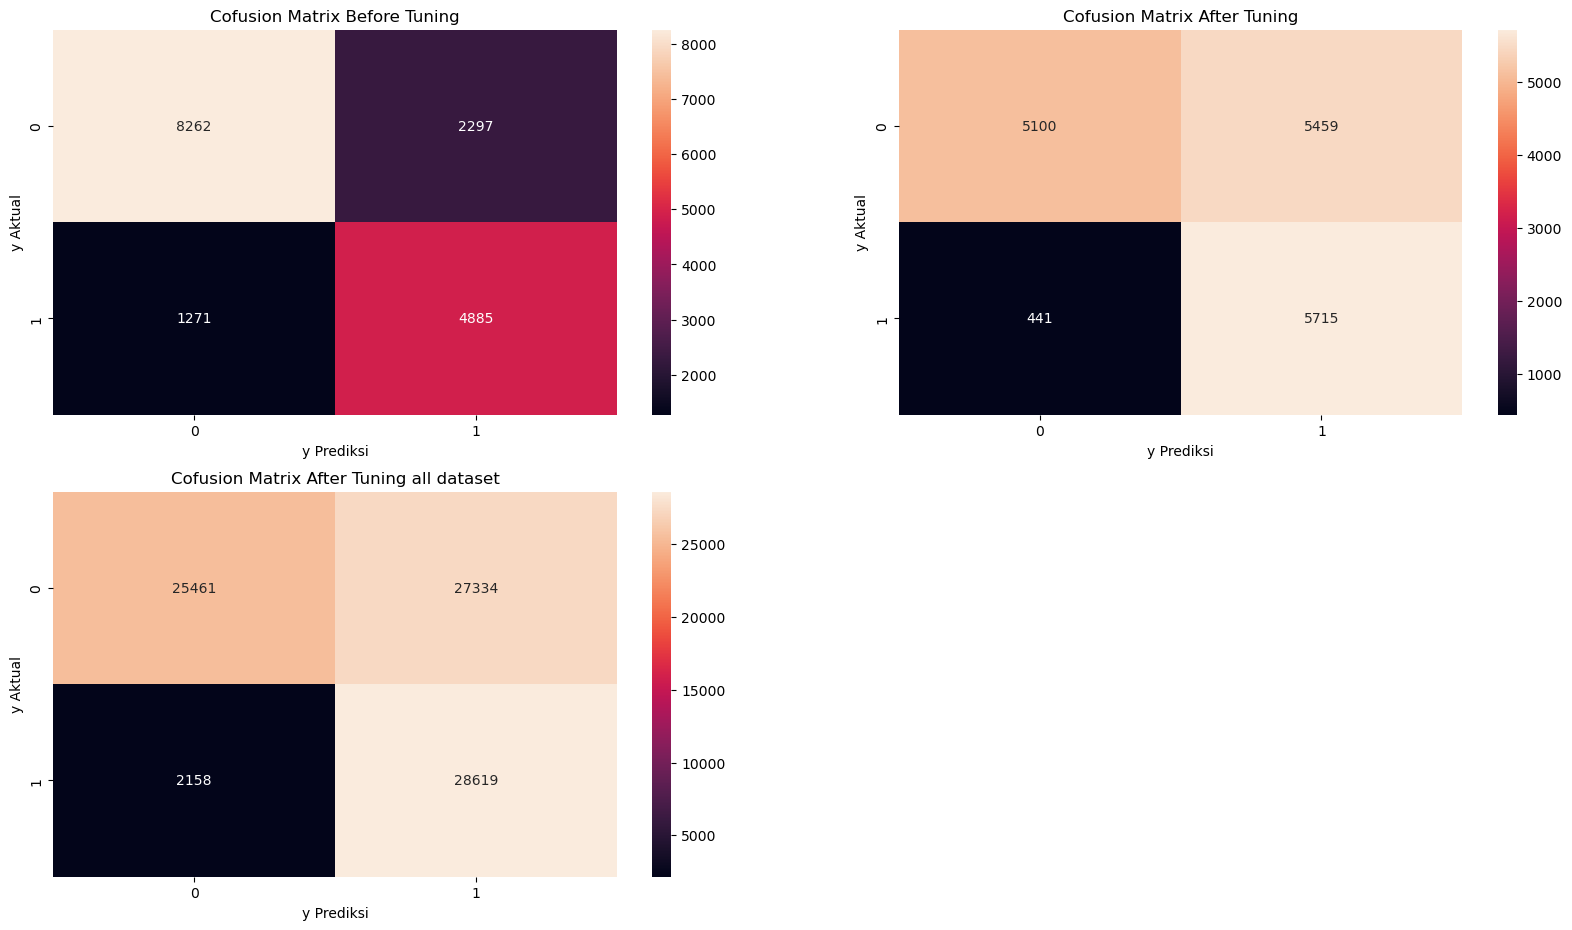

In [300]:
plt.figure(figsize=(20,11))
plt.subplot(2,2,1)
sns.heatmap(confusion_matrix(y_test,y_pred_before),annot=True,fmt='.0f')
plt.title('Cofusion Matrix Before Tuning')
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')

plt.subplot(2,2,2)
sns.heatmap(confusion_matrix(y_test,y_pred_dtc_tuning),annot=True,fmt='.0f')
plt.title('Cofusion Matrix After Tuning')
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual');

plt.subplot(2,2,3)
sns.heatmap(confusion_matrix(y,y_pred_dtc_all),annot=True,fmt='.0f')
plt.title('Cofusion Matrix After Tuning all dataset')
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual');

# Summary

Model yang paling baik yaitu DecisionTreeClassifier
- Random Forest before hyperparameter tuning Recall score:0.811218
- Random Forest After Hyperparameter tuning Recall score: 0.81028
- Random Forest After second Hyperparameter tuning Recall score: 0.80423
- DecisionTree before hyperparameter tuning recall score: 0.803095
- DecisionTree after hyperparameter tuning Recall score: 0.92836
- DecisionTree after second hyperparameter tuning Recall score: 0.96734

Karena hasil score DecisionTree setelah dituning sangat baik, jadi kita akan menggunkaan DecisionTree dengan parameter sebagai berikut:
- Best_score: 0.9679545497655738
- Best_params:
    - 'resampler': RandomUnderSampler(random_state=0)
    - 'model__random_state': 0
    - 'model__min_samples_split': 76
    - 'model__min_samples_leaf': 73
    - 'model__max_features': 1
    - 'model__max_depth': 3
    - 'model__criterion': 'gini'

## Explainable Machine Learning

### Feature Importance

In [118]:
dtc_tuning

Pipeline(steps=[('tansformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_poly_scaling',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(degree=1)),
                                                                  ('scaling',
                                                                   RobustScaler())]),
                                                  ['previous_cancellations',
                                                   'booking_changes',
                                                   'days_in_waiting_list',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['market_segment',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'reserved_room_type']),
                                                 ('binary', BinaryEncoder(),
                                                  ['country'])])),
                ('resampler', SMOTE(random_state=0)),
                ('model',
                 DecisionTreeClassifier(max_depth=6, max_features=9,
                                        min_samples_leaf=80,
                                        min_samples_split=32,
                                        random_state=0))])

In [122]:
# melihat nilai dari features importance
len(dtc_tuning['model'].feature_importances_)

32

In [206]:
feat_cat = list(transformer.transformers_[0][1][0].get_feature_names_out())
len(feat_cat)

6

In [235]:
col_robust = list(transformer.transformers_[0][1][1].get_feature_names_out())
len(col_robust)

6

In [208]:
col_onehot = list(transformer.transformers_[1][1].get_feature_names_out())
len(col_onehot)

19

In [204]:
col_binary = list(transformer.transformers_[2][2])
len(col_binary)

1

In [210]:
feat_all = feat_cat + col_robust + col_onehot + col_binary

In [251]:
# data frame feature importance yang telah diurutkan dari nilai importance yang paling tinggi
feat_imp = pd.DataFrame({
    'feature importance' : dtc_tuning['model'].feature_importances_
}, index = feat_all).sort_values('feature importance',ascending=False).head(15)

feat_imp

,feature importance
market_segment_Complementary,0.215625
market_segment_Offline TA/TO,0.147157
x3,0.141356
required_car_parking_spaces,0.115749
reserved_room_type_Other,0.102927
country,0.089774
x5,0.076164
x4,0.053641
previous_cancellations,0.024921
reserved_room_type_F,0.015651


Text(0.5, 1.0, 'Feature Importance')

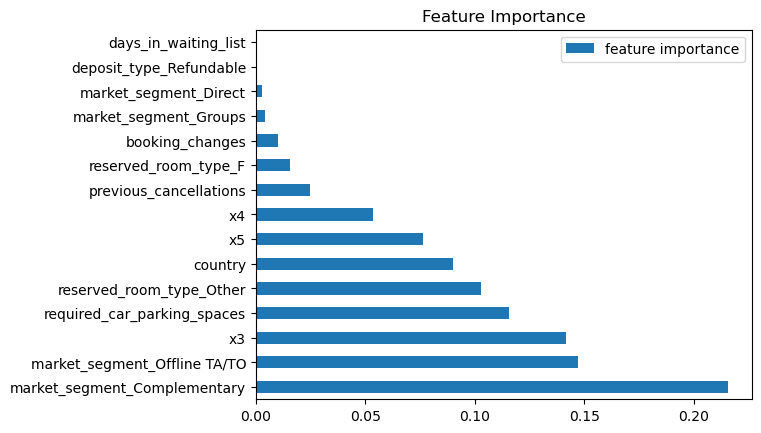

In [252]:
# membuat barplot untuk melakukan visualisasi terhadap feature importance
feat_imp.plot(kind='barh')
plt.title('Feature Importance')

3 Features dengan nilai importance tertinggi atau memiliki pengaruh penting terhadap customer dalam melakukan cancel atau tidak berdasarkan feature importance:
- market segment complementary
- market segment offline TA/TO
- required car parking space

## Save Model Pickle

Pickle adalah sebuah modul pada bahasa pemrograman Python yang digunakan untuk menyimpan model Machine Learning yang sudah dibuat.

In [249]:
import pickle

In [256]:
pickle.dump( dtc_tuning, open('hotel_booking_model.sav', 'wb'))

## Prediction to Customer with Final Model

In [257]:
model = pickle.load(open('hotel_booking_model.sav', 'rb'))
model

Pipeline(steps=[('tansformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_poly_scaling',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(degree=1)),
                                                                  ('scaling',
                                                                   RobustScaler())]),
                                                  ['previous_cancellations',
                                                   'booking_changes',
                                                   'days_in_waiting_list',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['market_segment',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'reserved_room_type']),
                                                 ('binary', BinaryEncoder(),
                                                  ['country'])])),
                ('resampler', SMOTE(random_state=0)),
                ('model',
                 DecisionTreeClassifier(max_depth=6, max_features=9,
                                        min_samples_leaf=80,
                                        min_samples_split=32,
                                        random_state=0))])

### Prediction to Customer in Dataset

In [258]:
# customer index 7 yang akan diprediksi
X.iloc[[7], :]

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests
7,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0


In [265]:
# melakukan predict pada seorang customer

model.predict(X.iloc[[3], :])

# customer index 3 diprediksi akan melakukan cancel

array([1], dtype=int64)

In [266]:
# y actual = 1 (cancel)
# prediksi di atas ternyata benar. Customer index 3 melakukan cancel (TP)
y[3]

1

### Prediction to New Customer

In [269]:
df_test = pd.DataFrame({
    'country': ['FRA'],
    'market_segment': ['Complementary'],
    'previous_cancellations': [2],
    'booking_changes': [1],
    'deposit_type': ['Non Refund'],
    'days_in_waiting_list':[10],
    'customer_type':['Transient-Party'],
    'reserved_room_type':['A'],
    'required_car_parking_spaces':[1],
    'total_of_special_requests':[1]
})

df_test

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests
0,FRA,Complementary,2,1,Non Refund,10,Transient-Party,A,1,1


In [270]:
# melakukan predict pada seorang customer baru 
model.predict(df_test)

# customer baru diprediksi tidak akan melakukan cancel

array([0], dtype=int64)

### Conclusion and Recomendation

In [276]:
print(classification_report(y_test, y_pred_dtc_tuning))

              precision    recall  f1-score   support

           0       0.92      0.48      0.63     10559
           1       0.51      0.93      0.66      6156

    accuracy                           0.65     16715
   macro avg       0.72      0.71      0.65     16715
weighted avg       0.77      0.65      0.64     16715



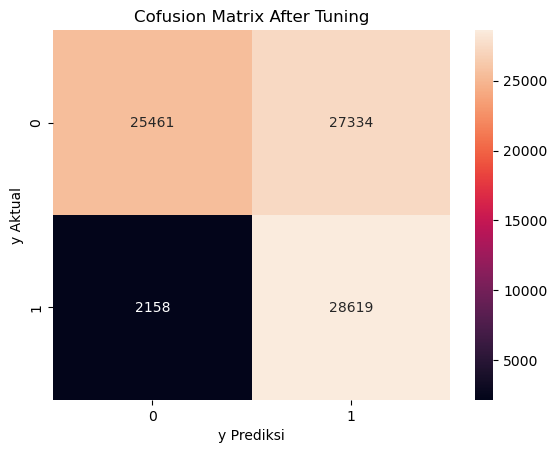

In [302]:
sns.heatmap(confusion_matrix(y,y_pred_dtc_all),annot=True,fmt='.0f')
plt.title('Cofusion Matrix After Tuning')
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual');

In [304]:
y_test.value_counts()

0    10559
1     6156
Name: is_canceled, dtype: int64

In [305]:
confusion_matrix(y_test, y_pred_dtc_tuning)

array([[5100, 5459],
       [ 441, 5715]], dtype=int64)

Berdasarkan hasil classification report dari model kita, kita dapat menyimpulkan/mengambil konklusi bahwa bila seandainya nanti kita menggunakan model kita untuk memfilter/menyaring list customer yang kita coba tawarkan, maka model kita dapat memprediksi 93% customer benar akan melakukan cancel pada hotel tersebut. 

Model kita ini memiliki ketepatan prediksi kandidat yang akan cancel sebesar 93% (recallnyanya), jadi setiap model kita memprediksi bahwa seorang kandidat itu akan cancel, maka kemungkinan tebakannya benar itu sebesar 93% kurang lebih. 

Jumlah kandidat customer yang kita miliki untuk suatu kurun waktu sebanyak 16.715 orang
maka hitungannya kurang lebih akan seperti ini :

persentase tebakan benar 
sebelum menggunakan machine learning:6156/(6156+10559) *100 % = 37,5% 
setelah menggunakan machine learning: 5715/5715+5459 = 51% 

sehingga, jika dianggap biaya kerugian 100$ maka tanpa menggunakan machine learning kita bisa mengurangi kerugian sebesar 3750$, 
sedangkan dengan menggunakan machine learning kita bisa mengurangi kerugian sebesar 5100$. 

Berdasarkan contoh hitungan tersebut, terlihat bahwa dengan menggunakan model kita, maka perusahaan tersebut akan menghemat biaya yang cukup besar.

### Recomendation

Hal-hal yang bisa dilakukan untuk mengembangkan project dan modelnya lebih baik lagi :
- Membuat sistem dimana hotel akan memprediksi customer yang akan melakukan cancel sehingga kamar dari orng yang bener-bener akan cancel dapat diberikan kepada orang yang tidak cancel. 
- menambahkan lebih banyak feature pada modelnya. 
- Menganalisa data-data yang model kita masih salah tebak untuk mengetahui alasannya dan karakteristiknya bagaimana.